Demonstrating overfitting and implementation of regularization techniques: L1, L2, Dropout

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

from keras.utils import np_utils
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

In [2]:
ds= load_iris()
X= ds.data
Y= ds.target

In [3]:
num_classes= 3
Y = np_utils.to_categorical(Y, num_classes) #categorical to numerical of dependent features

ss= StandardScaler() #standardization of independent features
X= ss.fit_transform(X)

In [7]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, train_size= 0.8)

In [8]:
X_train.shape

(120, 4)

## Without regularization and dropping

In [9]:
model = Sequential()
model.add(Dense(4, activation='tanh', input_shape=(4,)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=256, epochs=400, verbose=1, validation_data= (X_test, Y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 32)                160       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
1/1 [==============================] - 2s 

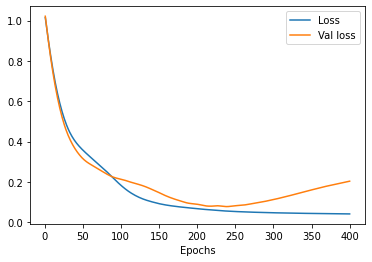

In [10]:
eps= [i for i in range(1, 401)]
loss= history.history.get('loss')
v_loss= history.history.get('val_loss')

plt.plot(eps, loss, label= "Loss")
plt.plot(eps, v_loss, label= "Val loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

## With L1 regularization



In [11]:
model = Sequential()
model.add(Dense(4, activation='tanh', input_shape=(4,), kernel_regularizer= 'l1'))
model.add(Dense(32, activation='tanh', kernel_regularizer= 'l1'))
model.add(Dense(32, activation='tanh', kernel_regularizer= 'l1'))
model.add(Dense(32, activation='relu', kernel_regularizer= 'l1'))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer= 'l1'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history_l1 = model.fit(X_train, Y_train, batch_size=256, epochs=400, verbose=1, validation_data= (X_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 32)                160       
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
1/1 [==============================] - 2

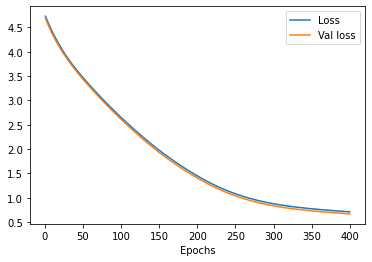

In [12]:
loss_l1= history_l1.history.get('loss')
v_loss_l1= history_l1.history.get('val_loss')

plt.plot(eps, loss_l1, label= "Loss")
plt.plot(eps, v_loss_l1, label= "Val loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

## With L2 regularization

In [13]:
model = Sequential()
model.add(Dense(4, activation='tanh', input_shape=(4,), kernel_regularizer= 'l2'))
model.add(Dense(32, activation='tanh', kernel_regularizer= 'l2'))
model.add(Dense(32, activation='tanh', kernel_regularizer= 'l2'))
model.add(Dense(32, activation='relu', kernel_regularizer= 'l2'))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer= 'l2'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history_l2 = model.fit(X_train, Y_train, batch_size=256, epochs=400, verbose=1, validation_data= (X_test, Y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 32)                160       
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
1/1 [==============================] - 2

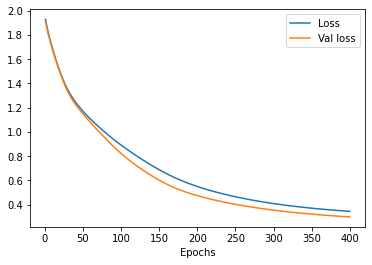

In [14]:
loss_l2= history_l2.history.get('loss')
v_loss_l2= history_l2.history.get('val_loss')

plt.plot(eps, loss_l2, label= "Loss")
plt.plot(eps, v_loss_l2, label= "Val loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

## With dropout

In [15]:
model = Sequential()
model.add(Dropout(0.4, input_shape=(4,)))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history_r = model.fit(X_train, Y_train, batch_size=256, epochs=400, verbose=1, validation_data= (X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_15 (Dense)            (None, 32)                160       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dropout_3 (Dropout)         (None, 32)               

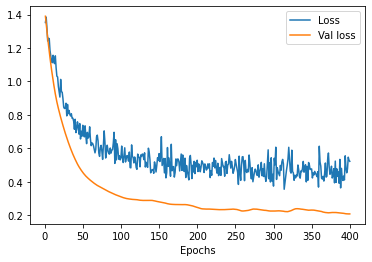

In [16]:
loss_r= history_r.history.get('loss')
v_loss_r= history_r.history.get('val_loss')

plt.plot(eps, loss_r, label= "Loss")
plt.plot(eps, v_loss_r, label= "Val loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

## Comparison

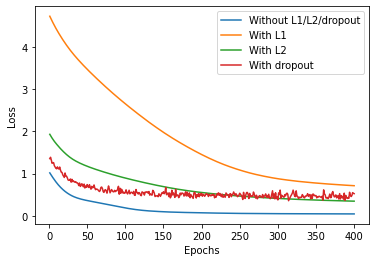

In [17]:
plt.plot(eps, loss, label = "Without L1/L2/dropout")
plt.plot(eps, loss_l1, label = "With L1")
plt.plot(eps, loss_l2, label = "With L2")
plt.plot(eps, loss_r, label = "With dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()